# Scanning Session Ingestion

## Setup

### Connect to the database

If you are don't have your login information, contact the administrator.

Using local config file (see [01_pipeline](./01_pipeline.ipynb)):

In [1]:
import os
# change to the upper level folder to detect dj_local_conf.json
if os.path.basename(os.getcwd())=='notebooks': os.chdir('..')
assert os.path.basename(os.getcwd())=='adamacs', ("Please move to the main directory")
import datajoint as dj; dj.conn()

from adamacs.pipeline import subject, session, surgery, scan, event, trial, imaging
from adamacs import utility
from adamacs.ingest import behavior as ibe
import numpy as np
import scanreader

[2023-01-16 16:34:15,738][INFO]: Connecting tobiasr@172.26.128.53:3306
[2023-01-16 16:34:15,780][INFO]: Connected tobiasr@172.26.128.53:3306
2023-01-16 16:34:15.910444: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-16 16:34:15.910472: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Loading DLC 2.2.1.1...


/home/tobiasr/anaconda3/envs/datajoint/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


Manual entry:

In [ ]:
# Manual Entry
import datajoint as dj; import getpass
dj.config['database.host'] = '172.26.128.53'        # Put the server name between these apostrophe
dj.config['database.user'] = 'root'             # Put your user name between these apostrophe
dj.config['database.password'] = getpass.getpass()  # Put your password in the prompt
dj.conn()

from adamacs.pipeline import subject, session, surgery, scan, event, trial, imaging
from adamacs import utility
from adamacs.ingest import behavior as ibe
import numpy as np

## populate scaninfo

In [ ]:
scan.ScanInfo.describe()

In [ ]:
scan.ScanInfo.heading

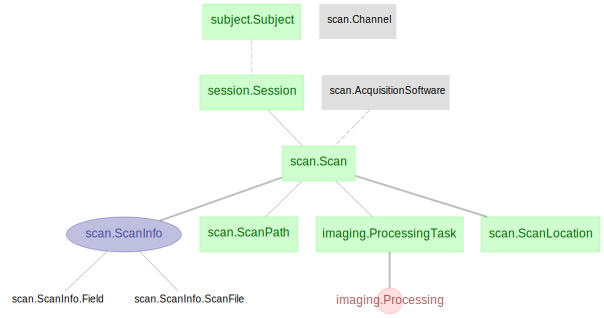

In [2]:
dj.Diagram(subject.Subject) + dj.Diagram(session.Session) + dj.Diagram(scan) + dj.Diagram(imaging.Processing)

In [6]:
# scan.ScanInfo.delete()
# scan.Scan.delete()
# session.Session.delete()

[2023-01-16 16:40:30,350][INFO]: Deleting 0 rows from `tobiasr_scan`.`_scan_info`
[2023-01-16 16:40:30,355][INFO]: Deleting 1 rows from `tobiasr_scan`.`scan_location`
[2023-01-16 16:40:30,358][INFO]: Deleting 1 rows from `tobiasr_scan`.`scan_path`
[2023-01-16 16:40:30,361][INFO]: Deleting 1 rows from `tobiasr_scan`.`scan`


Nothing to delete.


[2023-01-16 16:40:35,742][INFO]: Deleting 1 rows from `tobiasr_session`.`project_session`
[2023-01-16 16:40:35,746][INFO]: Deleting 1 rows from `tobiasr_session`.`session_directory`
[2023-01-16 16:40:35,750][INFO]: Deleting 1 rows from `tobiasr_session`.`session_user`
[2023-01-16 16:40:35,752][INFO]: Deleting 1 rows from `tobiasr_session`.`session`


Deletes committed.
Deletes committed.


1

In [12]:
scan.Scan() * scan.ScanPath() * session.Session() * scan.ScanLocation()

session_id,scan_id,user_id,path,scanner,acq_software,scan_notes free-notes,subject PyRat import uses this for earmark value,session_datetime,anatomical_location
sess9FG1UAQG,scan9FG1UAQG,1,/datajoint-data/data/tobiasr/TR_ROS-1438_2023-01-13_scan9FG1UAQG_sess9FG1UAQG,mini2p1,ScanImage,,ROS-1438,2023-01-13 00:00:00,RSCa


## populate scan!

In [14]:
populate_settings = {'display_progress': True}

In [16]:
scan.ScanInfo.populate(**populate_settings)
scan.ScanInfo()

ScanInfo:   0%|          | 0/1 [00:00<?, ?it/s]

<class 'list'> ['/datajoint-data/data/tobiasr/TR_ROS-1438_2023-01-13_scan9FG1UAQG_sess9FG1UAQG/scan9FG1UAQG_TR_ROS-1438_00006_00005.tif', '/datajoint-data/data/tobiasr/TR_ROS-1438_2023-01-13_scan9FG1UAQG_sess9FG1UAQG/scan9FG1UAQG_TR_ROS-1438_00006_00003.tif', '/datajoint-data/data/tobiasr/TR_ROS-1438_2023-01-13_scan9FG1UAQG_sess9FG1UAQG/scan9FG1UAQG_TR_ROS-1438_00006_00001.tif', '/datajoint-data/data/tobiasr/TR_ROS-1438_2023-01-13_scan9FG1UAQG_sess9FG1UAQG/scan9FG1UAQG_TR_ROS-1438_00006_00009.tif', '/datajoint-data/data/tobiasr/TR_ROS-1438_2023-01-13_scan9FG1UAQG_sess9FG1UAQG/scan9FG1UAQG_TR_ROS-1438_00006_00011.tif', '/datajoint-data/data/tobiasr/TR_ROS-1438_2023-01-13_scan9FG1UAQG_sess9FG1UAQG/scan9FG1UAQG_TR_ROS-1438_00006_00015.tif', '/datajoint-data/data/tobiasr/TR_ROS-1438_2023-01-13_scan9FG1UAQG_sess9FG1UAQG/scan9FG1UAQG_TR_ROS-1438_00006_00008.tif', '/datajoint-data/data/tobiasr/TR_ROS-1438_2023-01-13_scan9FG1UAQG_sess9FG1UAQG/scan9FG1UAQG_TR_ROS-1438_00006_00012.tif', '/datajo

ScanInfo:   0%|          | 0/1 [00:00<?, ?it/s]


OperationalError: (1241, 'Operand should contain 1 column(s)')

In [ ]:
scan.Scan() * scan.ScanLocation()

Example to update an entry post-hoc. TODO: imnplement in elements "Scan" function based on userfunction stringa

In [ ]:
scan.Scan.update1({'session_id': 'sess9FF6TL96', 'scan_id': 'scan9FF6TL96', 'scan_notes': "test2"})

In [ ]:
scan.ScanLocation.update1({'session_id': 'sess9FF6TL96', 'scan_id': 'scan9FF6TL96', 'anatomical_location': "V1"})

In [ ]:
session.ProjectSession()

In [ ]:
scan.Scan()

In [ ]:
scan.ScanLocation()

### Creating a Parameter Set

What exactly happens during processing dependso on the parameter set. This is an example of a parameter set and its insert:

In [ ]:
# Insert the param_set

# TODO: Parameter set needs to be updated with ScanInfo settings

params_suite2p = {'look_one_level_down': 0.0,
                  'fast_disk': [],
                  'delete_bin': False,
                  'mesoscan': False,
                  'h5py': [],
                  'h5py_key': 'data',
                  'save_path0': [],
                  'subfolders': [],
                  'nplanes': 1,
                  'nchannels': 1,
                  'functional_chan': 1,
                  'tau': 1.0,
                  'fs': 10.0,
                  'force_sktiff': False,
                  'preclassify': 0.0,
                  'save_mat': False,
                  'combined': True,
                  'aspect': 1.0,
                  'do_bidiphase': False,
                  'bidiphase': 0.0,
                  'do_registration': True,
                  'keep_movie_raw': False,
                  'nimg_init': 300,
                  'batch_size': 500,
                  'maxregshift': 0.1,
                  'align_by_chan': 1,
                  'reg_tif': False,
                  'reg_tif_chan2': False,
                  'subpixel': 10,
                  'smooth_sigma': 1.15,
                  'th_badframes': 1.0,
                  'pad_fft': False,
                  'nonrigid': True,
                  'block_size': [128, 128],
                  'snr_thresh': 1.2,
                  'maxregshiftNR': 5.0,
                  '1Preg': False,
                  'spatial_hp': 50.0,
                  'pre_smooth': 2.0,
                  'spatial_taper': 50.0,
                  'roidetect': True,
                  'sparse_mode': False,
                  'diameter': 12,
                  'spatial_scale': 0,
                  'connected': True,
                  'nbinned': 5000,
                  'max_iterations': 20,
                  'threshold_scaling': 1.0,
                  'max_overlap': 0.75,
                  'high_pass': 100.0,
                  'inner_neuropil_radius': 2,
                  'min_neuropil_pixels': 350,
                  'allow_overlap': False,
                  'chan2_thres': 0.65,
                  'baseline': 'maximin',
                  'win_baseline': 60.0,
                  'sig_baseline': 10.0,
                  'prctile_baseline': 8.0,
                  'neucoeff': 0.7,
                  'xrange': np.array([0, 0]),
                  'yrange': np.array([0, 0])}

imaging.ProcessingParamSet.insert_new_params('suite2p', 2, 'basic params', params_suite2p)

In [ ]:
imaging.ProcessingTask().delete()
imaging.ProcessingTask().drop()
imaging.ProcessingParamSet().drop()

### Create and Run a Processing Task

In [ ]:
imaging.ProcessingTask.insert1(('sess9FF6TL96',
                                'scan9FF6TL96',
                                2,
                                'JJ_ROS-1438_2022-11-22_scan9FF6TL96_sess9FF6TL96/suite2p',
                                'trigger'))

To run all unprocessed processing task we call populate on processing:

In [ ]:
imaging.Processing.populate(display_progress=True)

In [ ]:
imaging.scan()

In [ ]:
imaging.ProcessingTask()

In [ ]:
imaging.Processing()

In [ ]:
session_key = (session.Session & 'subject = "ROS-1438"').fetch('KEY')[0]

In [ ]:
scan.ScanInfo.ScanFile()


In [ ]:
scan.Scan & session_key

In [ ]:
scan.ScanInfo & session_key

In [ ]:
scan.ScanInfo.Field & session_key

In [ ]:
imaging.ProcessingParamSet()

In [ ]:
imaging.ProcessingTask * imaging.Processing & session_key

In [ ]:
imaging.Curation & session_key

Scanreader payload testing

In [ ]:
path = scan.ScanInfo.ScanFile().fetch('file_path')[0]
infoscan = scanreader.read_scan(path)

In [ ]:

infoscan.user_funtion


In [ ]:
scan.ScanInfo()

In [ ]:
session.Session()

In [ ]:
Sess